# Predicting heart disease using machine learning 

This notebook looks into using various Python-based machine learning and data science libraries in an attempt to build machine learning models capable of predicting whether or not someone has a heart disease or not based on thier medical attributes. 

We're going to take the following approach 
1. Problem definition 
2. Data 
3. Evaluation 
4. Features 
5. Modelling 
6. Experimentation 

## 1. Problem Definition 

In a statement, 
> Given clinical parameters about a patient , can we predict whether the patient has a heart disease or not ? 

## 2. Data 

The original data came from Clevland database from the UCI machine learning repository there is also a version of it avialable on kaggle. 

https://archive.ics.uci.edu/ml/datasets/heart+disease


## 3. Evaluation 

> If we can reach 95% accuracy and predicting whether or not a patient has heart disease or not, we will pursue the project. 

## 4. Features 

**Create data dictionary** 

This is where you get information about each of the deatures in the data. 

* #3 (age)
* #4 (sex)
* #9 (cp)
* #10 (trestbps)
* #12 (chol)
* #16 (fbs)
* #19 (restecg)
* #32 (thalach)
* #38 (exang)
* #40 (oldpeak)
* #41 (slope)
* #44 (ca)
* #51 (thal)
* #58 (num) (the predicted attribute)

In [1]:
import sklearn
sklearn.__version__

'1.2.2'

## Features 

* sex: sex: sex (1 = male; 0 = female)
* cp: chest pain type
1. --Value 1: typical angina : chest pain related to decrease blood suppply to heart. 
2. -- Value 2: atypical angina: chest pain not realted to heart.
3. -- Value 3: non-anginal pain: typical esophegal spasms
4. -- Value 4: asymptomatic: chest pain not showing signs of disease. 
* trestbps:  resting blood pressure (in mm Hg on admission to the hospital)
* chol: serum cholestoral in mg/dl	
* fbs: (fasting blood sugar > 120 mg/dl) (1 = true; 0 = false)
* restecg: resting electrocardiographic results
1. -- Value 0: normal
2. -- Value 1: having ST-T wave abnormality (T wave inversions and/or ST elevation or depression of > 0.05 mV)
3. -- Value 2: showing probable or definite left ventricular hypertrophy by Estes' criteria	
* thalach: maximum heart rate achieved
* exang	: exercise induced angina (1 = yes; 0 = no)
* oldpeak:  ST depression induced by exercise relative to rest
* slope : the slope of the peak exercise ST segment
1. -- Value 1: upsloping
2. -- Value 2: flat
3. -- Value 3: downsloping
* ca: number of major vessels (0-3) colored by flourosopy
* thal:  3 = normal; 6 = fixed defect; 7 = reversabledefect 

# Preparing the tools 

We are going to use numpy and matplotlib for data analysis and 
manipulation. 

In [2]:
# Import all the tools we need 



# Regular EDA and plotting libraries 
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt 
import seaborn as sns 

# we want our plots to be inside the notebook 
%matplotlib inline 

# Models from Scikit-Learn 
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier 
from sklearn.ensemble import RandomForestClassifier

# Model evaluation
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.model_selection import RandomizedSearchCV, GridSearchCV
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.metrics import precision_score, recall_score, f1_score
from sklearn.metrics import roc_curve

## Load data 

In [3]:
df = pd.read_csv("heart-disease.csv")

In [4]:
df.shape #(rows,columns)

(303, 14)

## Data exploration (exploratory data analysis)

the goal here is to find out more about the data and become a SME on the data set you are working with. 

1. what questions are you trying to solve? 
2. what kind of data do we have and how do we treat different types ? 
3. what's missing from the data and how you deal with it ?
4. what are the outliers and how you care about them ?
5. How can you add , change or remove features out of your data? 

In [5]:
df.tail()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
298,57,0,0,140,241,0,1,123,1,0.2,1,0,3,0
299,45,1,3,110,264,0,1,132,0,1.2,1,0,3,0
300,68,1,0,144,193,1,1,141,0,3.4,1,2,3,0
301,57,1,0,130,131,0,1,115,1,1.2,1,1,3,0
302,57,0,1,130,236,0,0,174,0,0.0,1,1,2,0


In [6]:
df["target"].value_counts()

target
1    165
0    138
Name: count, dtype: int64

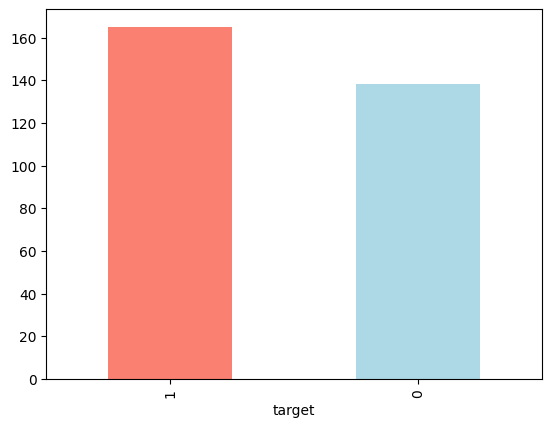

In [7]:
df["target"].value_counts().plot(kind="bar", color=["salmon","lightblue"]);

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       303 non-null    int64  
 1   sex       303 non-null    int64  
 2   cp        303 non-null    int64  
 3   trestbps  303 non-null    int64  
 4   chol      303 non-null    int64  
 5   fbs       303 non-null    int64  
 6   restecg   303 non-null    int64  
 7   thalach   303 non-null    int64  
 8   exang     303 non-null    int64  
 9   oldpeak   303 non-null    float64
 10  slope     303 non-null    int64  
 11  ca        303 non-null    int64  
 12  thal      303 non-null    int64  
 13  target    303 non-null    int64  
dtypes: float64(1), int64(13)
memory usage: 33.3 KB


In [9]:
df.isna().sum()

age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
target      0
dtype: int64

In [10]:
df.describe()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
count,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000
mean,54.366337,0.683168,0.966997,131.623762,246.264026,0.148515,0.528053,149.646865,0.326733,1.039604,1.399340,0.729373,2.313531,0.544554
std,9.082101,0.466011,1.032052,17.538143,51.830751,0.356198,0.525860,22.905161,0.469794,1.161075,0.616226,1.022606,0.612277,0.498835
min,29.000000,0.000000,0.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,47.500000,0.000000,0.000000,120.000000,211.000000,0.000000,0.000000,133.500000,0.000000,0.000000,1.000000,0.000000,2.000000,0.000000
50%,55.000000,1.000000,1.000000,130.000000,240.000000,0.000000,1.000000,153.000000,0.000000,0.800000,1.000000,0.000000,2.000000,1.000000
75%,61.000000,1.000000,2.000000,140.000000,274.500000,0.000000,1.000000,166.000000,1.000000,1.600000,2.000000,1.000000,3.000000,1.000000
max,77.000000,1.000000,3.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,4.000000,3.000000,1.000000


### heart disease frequency according to sex 

In [11]:
df.sex.value_counts()

sex
1    207
0     96
Name: count, dtype: int64

In [12]:
# Compare target column with sex column

pd.crosstab(df.target, df.sex)

sex,0,1
target,,
0,24,114
1,72,93


1. There are about 100 women 
2. 72 of 96 has a heart disease 
3. participant is a women , 75% chance she has a heart disease 
4. if the participant is a male, 93 out of 207 has a heart disease 
5. 44% of the males have a heart disease. 
6. 59.5% of chance that anyone out of male or female has a heart disease. 

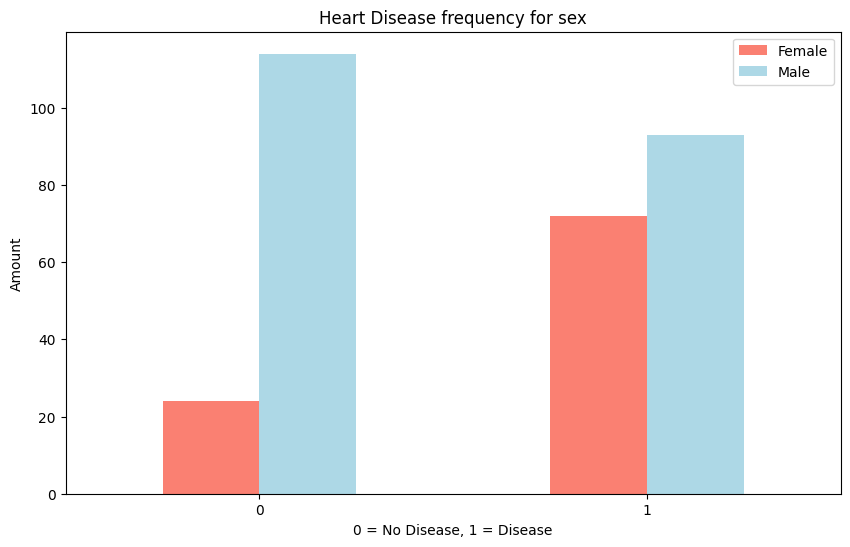

In [13]:
# Create a plot of crosstab
pd.crosstab(df.target, df.sex).plot(kind="bar", 
                                   figsize=(10,6), 
                                   color = ["salmon", "lightblue"])

plt.title("Heart Disease frequency for sex")
plt.xlabel("0 = No Disease, 1 = Disease")
plt.ylabel("Amount")
plt.legend(["Female", "Male"]);
plt.xticks(rotation=0);

In [14]:
df["thalach"].value_counts()

thalach
162    11
160     9
163     9
152     8
173     8
       ..
202     1
184     1
121     1
192     1
90      1
Name: count, Length: 91, dtype: int64

### Age vs max heart rate for heart disease 

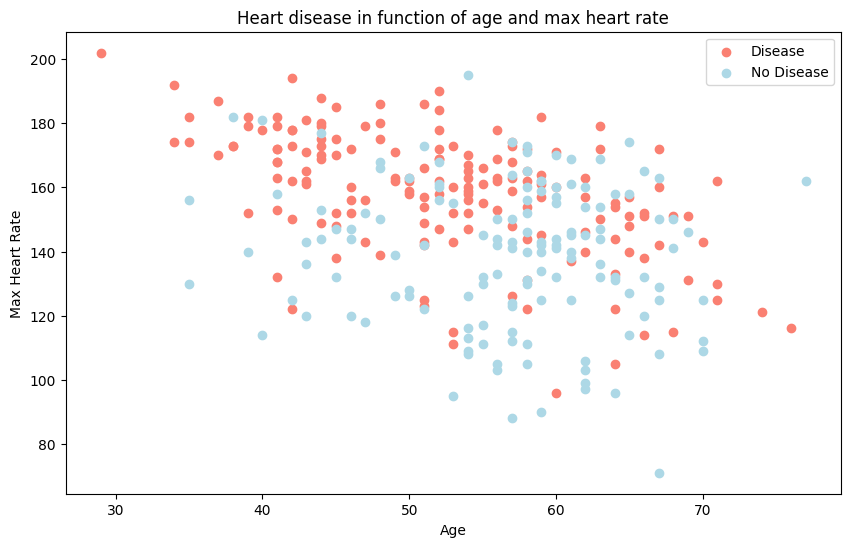

In [15]:
# Create another figure 
plt.figure(figsize=(10,6))

# Scatter with positive examples 
plt.scatter(df.age[df.target==1], 
           df.thalach[df.target==1], 
           c= "salmon")

# scatter with negative examples 
plt.scatter(df.age[df.target==0], 
           df.thalach[df.target==0], 
           c="lightblue")

# Add some helpful info 
plt.title("Heart disease in function of age and max heart rate")
plt.xlabel("Age")
plt.ylabel("Max Heart Rate")
plt.legend(["Disease", "No Disease"]);

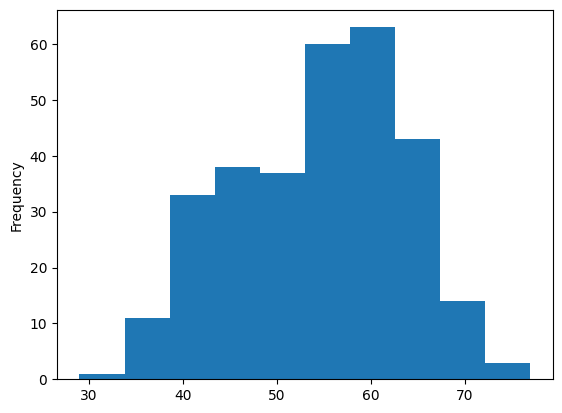

In [16]:
# Check the distribution of the age column 
df.age.plot.hist();

### Heart disease Frequency chest pain type 

* cp: chest pain type
1. --Value 1: typical angina : chest pain related to decrease blood suppply to heart. 
2. -- Value 2: atypical angina: chest pain not realted to heart.
3. -- Value 3: non-anginal pain: typical esophegal spasms (not heart related)
4. -- Value 4: asymptomatic: chest pain not showing signs of disease. 


In [17]:
df.cp.value_counts()

cp
0    143
2     87
1     50
3     23
Name: count, dtype: int64

In [18]:
pd.crosstab(df.cp, df.target)

target,0,1
cp,,
0,104,39
1,9,41
2,18,69
3,7,16


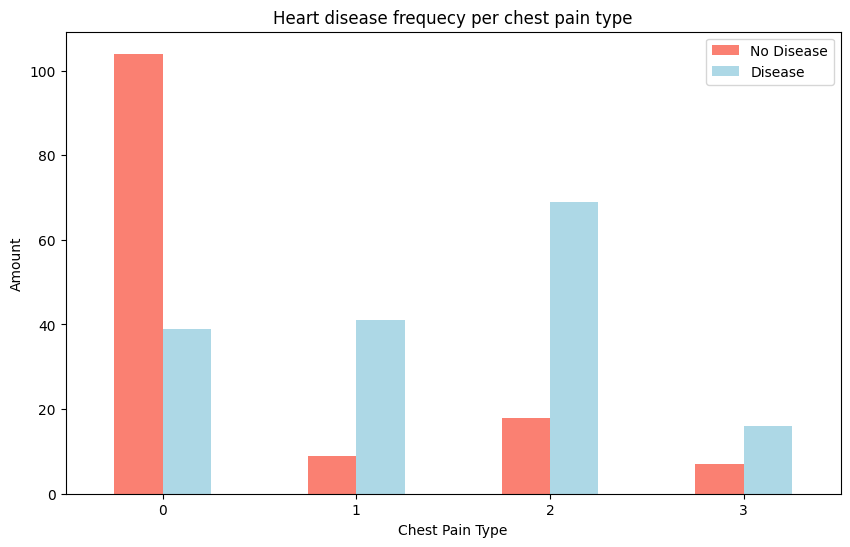

In [19]:
# Make the cross tab more visual 

pd.crosstab(df.cp, df.target).plot(kind="bar", 
                                  figsize=(10,6), 
                                  color = ["salmon", "lightblue"])

# add some communication 
plt.title("Heart disease frequecy per chest pain type")
plt.xlabel("Chest Pain Type")
plt.ylabel("Amount")
plt.legend(["No Disease", "Disease"])
plt.xticks(rotation=0);

In [20]:
df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


### Correlation matrix how each independent variables are realted to each other 

1. positive coorelation: higher positive value means postive coorealtion.  
2. negative coorelation: higher negative value means negative coorelation. 

In [21]:
df.corr()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
age,1.000000,-0.098447,-0.068653,0.279351,0.213678,0.121308,-0.116211,-0.398522,0.096801,0.210013,-0.168814,0.276326,0.068001,-0.225439
sex,-0.098447,1.000000,-0.049353,-0.056769,-0.197912,0.045032,-0.058196,-0.044020,0.141664,0.096093,-0.030711,0.118261,0.210041,-0.280937
cp,-0.068653,-0.049353,1.000000,0.047608,-0.076904,0.094444,0.044421,0.295762,-0.394280,-0.149230,0.119717,-0.181053,-0.161736,0.433798
trestbps,0.279351,-0.056769,0.047608,1.000000,0.123174,0.177531,-0.114103,-0.046698,0.067616,0.193216,-0.121475,0.101389,0.062210,-0.144931
chol,0.213678,-0.197912,-0.076904,0.123174,1.000000,0.013294,-0.151040,-0.009940,0.067023,0.053952,-0.004038,0.070511,0.098803,-0.085239
fbs,0.121308,0.045032,0.094444,0.177531,0.013294,1.000000,-0.084189,-0.008567,0.025665,0.005747,-0.059894,0.137979,-0.032019,-0.028046
restecg,-0.116211,-0.058196,0.044421,-0.114103,-0.151040,-0.084189,1.000000,0.044123,-0.070733,-0.058770,0.093045,-0.072042,-0.011981,0.137230
thalach,-0.398522,-0.044020,0.295762,-0.046698,-0.009940,-0.008567,0.044123,1.000000,-0.378812,-0.344187,0.386784,-0.213177,-0.096439,0.421741
exang,0.096801,0.141664,-0.394280,0.067616,0.067023,0.025665,-0.070733,-0.378812,1.000000,0.288223,-0.257748,0.115739,0.206754,-0.436757
oldpeak,0.210013,0.096093,-0.149230,0.193216,0.053952,0.005747,-0.058770,-0.344187,0.288223,1.000000,-0.577537,0.222682,0.210244,-0.430696


(14.5, -0.5)

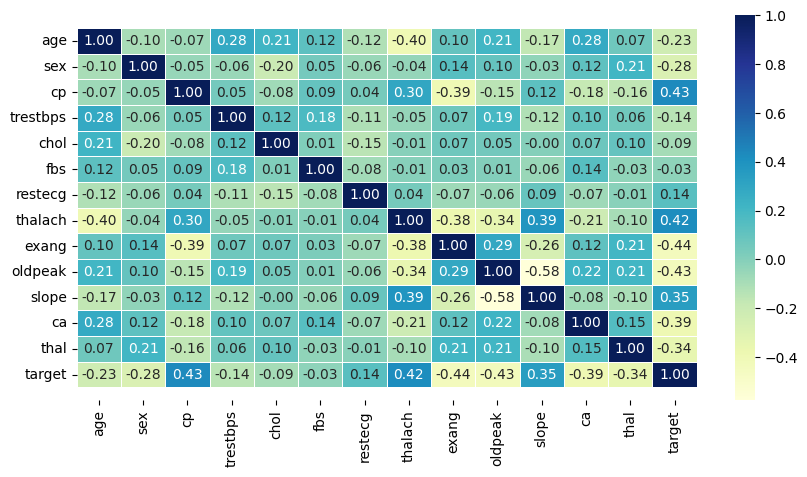

In [22]:
# Lets make our coorealtion matrix a little prettier 

corr_matrix = df.corr()
fig, ax = plt.subplots(figsize=(10,5))
ax = sns.heatmap(corr_matrix, annot= True, 
                linewidth=0.5, 
                fmt=".2f", 
                cmap = "YlGnBu");

bottom, top = ax.get_ylim()
ax.set_ylim(bottom + 0.5 , top -0.5)

### exang : exercise induced angina (1 = yes; 0 = no)
### target: have disease or not (1=yes, 0=no)

excercise induce angina is trending towards the individual not having a heart disease. 

### Building a machine learning model based on the data that we have

1. Problem defintion 
2. data 
3. evaluation 
4. features 
5. modelling 
6. experiments 

### 5. Modelling 

In [23]:
df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [24]:
# Split data into X and y 
X = df.drop("target", axis=1)
y = df["target"]

In [25]:
X

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...
298,57,0,0,140,241,0,1,123,1,0.2,1,0,3
299,45,1,3,110,264,0,1,132,0,1.2,1,0,3
300,68,1,0,144,193,1,1,141,0,3.4,1,2,3
301,57,1,0,130,131,0,1,115,1,1.2,1,1,3


In [26]:
y

0      1
1      1
2      1
3      1
4      1
      ..
298    0
299    0
300    0
301    0
302    0
Name: target, Length: 303, dtype: int64

In [27]:
# split data into train and test sets 
np.random.seed(42)
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2)


In [28]:
X_train

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal
132,42,1,1,120,295,0,1,162,0,0.0,2,0,2
202,58,1,0,150,270,0,0,111,1,0.8,2,0,3
196,46,1,2,150,231,0,1,147,0,3.6,1,0,2
75,55,0,1,135,250,0,0,161,0,1.4,1,0,2
176,60,1,0,117,230,1,1,160,1,1.4,2,2,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...
188,50,1,2,140,233,0,1,163,0,0.6,1,1,3
71,51,1,2,94,227,0,1,154,1,0.0,2,1,3
106,69,1,3,160,234,1,0,131,0,0.1,1,1,2
270,46,1,0,120,249,0,0,144,0,0.8,2,0,3


In [29]:
y_train , len(y_train)

(132    1
 202    0
 196    0
 75     1
 176    0
       ..
 188    0
 71     1
 106    1
 270    0
 102    1
 Name: target, Length: 242, dtype: int64,
 242)

1. Now we have got our data split into train and test sets and its time to build machine learning model. 

2. We will train (find the patterns) in the training set. 

3. We will test it (use the patterns) on the test set. 

We are going to try 3 different machine learning models 
1. Logistic regression 
2. K-nearest neighbours classifier 
3. Random Forest classifier 

In [30]:
# Put models in a dictionary 
models = {"Logistic Regression": LogisticRegression(), 
         "KNN": KNeighborsClassifier(), 
         "Random Forest": RandomForestClassifier()}

# Create a function to fit and score models 

def fit_and_score(models, X_train, X_test, y_train, y_test):
    """
    Fits and evaluates given machine learning models.
    models: a dict of different Scikit-Learn machine learning models. 
    X_train: training data (no labels)
    X_test: testing data no (no labels)
    y_train: training labels 
    y_test: test labels
    """
    
    # set random seed 
    np.random.seed(42)
    # make a dicitonary to keep model scores 
    model_scores = {}
    # loop through models 
    for name, model in models.items():
        # fit the model to the data 
        model.fit(X_train, y_train)
        # evaluate the model and append its scores to model_Score
        model_scores[name] = model.score(X_test, y_test)
    return model_scores

In [31]:
model_scores = fit_and_score(models=models, 
                            X_train = X_train, 
                            X_test = X_test, 
                            y_train = y_train, 
                            y_test = y_test)

model_scores

/Users/ishaangupta/anaconda/anaconda3/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


{'Logistic Regression': 0.8852459016393442,
 'KNN': 0.6885245901639344,
 'Random Forest': 0.8360655737704918}

## Model comparison 

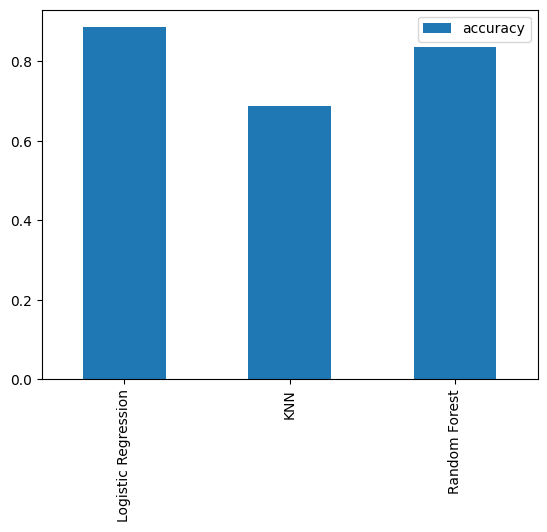

In [32]:
model_compare = pd.DataFrame(model_scores, index=["accuracy"])
model_compare.T.plot.bar();

Now we have got a baseline model and we know our models first prediction and what we shoud base our next steps on.

### classification 
1. Accuracy 
2. precision 
3. recall 
4. f-1

Confusion matrix,
classification report 

### Regression 
1. r-squared 
2. mean absolute error 
3. mean squared error 
4. Root mean squared error 

Lets look at the following: 
* Hyper parameter tuning 
* Feature importance 
* Confusion matrix 
* Cross-validation 
* Recall 
* F1 score 
* Classification report 
* ROC curve 
* Area under the curve (AUC)

### hyperparameter tuninng (by hand)

In [33]:
# lets tune knn

train_scores = []
test_scores = []

# Create a list of different values for n_neighbors 

neighbors = range(1,21)

# setup KNN instance 
knn = KNeighborsClassifier()

# loop through different n_neighbors 

for i in neighbors:
    knn.set_params(n_neighbors=i)
    
    # fit the algorithm 
    knn.fit(X_train , y_train)
    
    # update the training scores list 
    train_scores.append(knn.score(X_train, y_train))
    
    # update the test scores list 
    test_scores.append(knn.score(X_test, y_test))

In [34]:
train_scores

[1.0,
 0.8099173553719008,
 0.7727272727272727,
 0.743801652892562,
 0.7603305785123967,
 0.7520661157024794,
 0.743801652892562,
 0.7231404958677686,
 0.71900826446281,
 0.6942148760330579,
 0.7272727272727273,
 0.6983471074380165,
 0.6900826446280992,
 0.6942148760330579,
 0.6859504132231405,
 0.6735537190082644,
 0.6859504132231405,
 0.6652892561983471,
 0.6818181818181818,
 0.6694214876033058]

In [35]:
test_scores

[0.6229508196721312,
 0.639344262295082,
 0.6557377049180327,
 0.6721311475409836,
 0.6885245901639344,
 0.7213114754098361,
 0.7049180327868853,
 0.6885245901639344,
 0.6885245901639344,
 0.7049180327868853,
 0.7540983606557377,
 0.7377049180327869,
 0.7377049180327869,
 0.7377049180327869,
 0.6885245901639344,
 0.7213114754098361,
 0.6885245901639344,
 0.6885245901639344,
 0.7049180327868853,
 0.6557377049180327]

Maximum KNN score on the test data: 75.41%


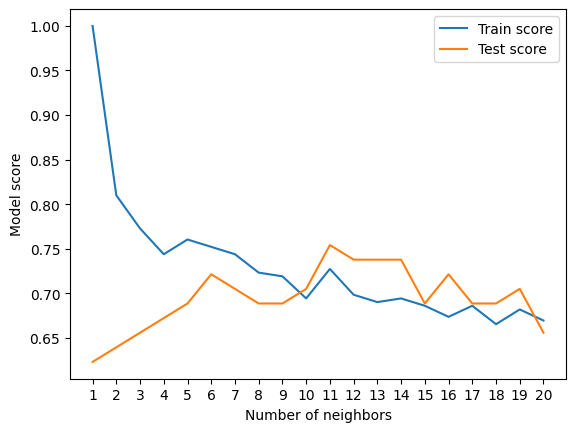

In [36]:
plt.plot(neighbors, train_scores, label="Train score")
plt.plot(neighbors, test_scores, label = "Test score")
plt.xticks(np.arange(1,21,1))
plt.xlabel("Number of neighbors")
plt.ylabel("Model score")
plt.legend()

print(f"Maximum KNN score on the test data: {max(test_scores)*100:.2f}%")

## Hyperparamter tuning with Randomized searchCV 

We are going to tune: 
* LogisticRegression()
* RandomForestClassifier()
* ... RandomizedSearchCV

In [37]:
# Create a hyperparameter grid for logisticregression 

log_reg_grid = {"C": np.logspace(-4,4,30), 
               "solver": ["liblinear"]}

# Create a hyperparamter grid for RandomForestClassifier 
rf_grid = {"n_estimators": np.arange(10, 1000, 50), 
          "max_depth": [None, 3, 5, 10], 
          "min_samples_split": np.arange(2, 20, 2), 
          "min_samples_leaf": np.arange(1, 20, 2)}


Now we have got hyperparameter grids setup for each of our models lets tune them using RandomizedSearchCV

In [38]:
# Tune logistic regression 

np.random.seed(42)

# Setup random hyperparameter search for LogisticRegression 
rs_log_reg = RandomizedSearchCV(LogisticRegression(), 
                               param_distributions= log_reg_grid, 
                               cv=5,n_iter = 20, 
                               verbose = True)

# Fit Randomhyperparameter search model for LogisticRegression 
rs_log_reg.fit(X_train , y_train)

Fitting 5 folds for each of 20 candidates, totalling 100 fits


RandomizedSearchCV(cv=5, estimator=LogisticRegression(), n_iter=20,
                   param_distributions={'C': array([1.00000000e-04, 1.88739182e-04, 3.56224789e-04, 6.72335754e-04,
       1.26896100e-03, 2.39502662e-03, 4.52035366e-03, 8.53167852e-03,
       1.61026203e-02, 3.03919538e-02, 5.73615251e-02, 1.08263673e-01,
       2.04335972e-01, 3.85662042e-01, 7.27895384e-01, 1.37382380e+00,
       2.59294380e+00, 4.89390092e+00, 9.23670857e+00, 1.74332882e+01,
       3.29034456e+01, 6.21016942e+01, 1.17210230e+02, 2.21221629e+02,
       4.17531894e+02, 7.88046282e+02, 1.48735211e+03, 2.80721620e+03,
       5.29831691e+03, 1.00000000e+04]),
                                        'solver': ['liblinear']},
                   verbose=True)

In [39]:
rs_log_reg.best_params_

{'solver': 'liblinear', 'C': 0.20433597178569418}

In [40]:
rs_log_reg.score(X_test, y_test)

0.8852459016393442

Now we tune logistic regression , lets do the same for RandomForestClassifier. 

In [41]:
# Setup random seed 
np.random.seed(42)

# Setup random hyperparameter search for RandomForestClassifier 

rs_rf = RandomizedSearchCV(RandomForestClassifier(), 
                          param_distributions=rf_grid, 
                          cv=5, n_iter = 20, 
                          verbose = True)

# Fit ranodm hyperparameter search model for RandomForestClassifier.
rs_rf.fit(X_train, y_train)

Fitting 5 folds for each of 20 candidates, totalling 100 fits


RandomizedSearchCV(cv=5, estimator=RandomForestClassifier(), n_iter=20,
                   param_distributions={'max_depth': [None, 3, 5, 10],
                                        'min_samples_leaf': array([ 1,  3,  5,  7,  9, 11, 13, 15, 17, 19]),
                                        'min_samples_split': array([ 2,  4,  6,  8, 10, 12, 14, 16, 18]),
                                        'n_estimators': array([ 10,  60, 110, 160, 210, 260, 310, 360, 410, 460, 510, 560, 610,
       660, 710, 760, 810, 860, 910, 960])},
                   verbose=True)

In [42]:
# find the best hyperparameters 

rs_rf.best_params_

{'n_estimators': 210,
 'min_samples_split': 4,
 'min_samples_leaf': 19,
 'max_depth': 3}

In [43]:
# Evaluate the randomized search RandomForestClassifer model 
rs_rf.score(X_test, y_test)

0.8688524590163934

In [44]:
model_scores

{'Logistic Regression': 0.8852459016393442,
 'KNN': 0.6885245901639344,
 'Random Forest': 0.8360655737704918}

1. by hand 
2. RandomizedSearchCV
3. GridSearchCV 

# Hyperparameter Tuning using GridSearchCV 

since our LogisticRegression model provides the best scores so far, 
we will try using GridSearchCV

In [45]:
# Different hyperparameters for our LogisticRegression model

log_reg_grid = {"C": np.logspace(-4,4,30), 
               "solver": ["liblinear"]}

# Setup grid hyperparameter search for LogisticRegression 
gs_log_reg = GridSearchCV(LogisticRegression(), 
                         param_grid = log_reg_grid, 
                         cv = 5, verbose = True)

# Fit grid hyperparameter search model 
gs_log_reg.fit(X_train, y_train);

Fitting 5 folds for each of 30 candidates, totalling 150 fits


In [46]:
# Check the best hyperparameters 
gs_log_reg.best_params_

{'C': 0.20433597178569418, 'solver': 'liblinear'}

In [47]:
# Evaluate the grid search LogisticRegression model 
gs_log_reg.score(X_test, y_test)

0.8852459016393442

In [48]:
model_scores

{'Logistic Regression': 0.8852459016393442,
 'KNN': 0.6885245901639344,
 'Random Forest': 0.8360655737704918}

## Evaluating our tuned machine learning classifier 

* ROC curve and AUC score 
* Confusion matrix 
* Classification 
* Precision 
* Recall 
* F-1 score 

and it would be great if cross validation is used where possible.

To make comparisons and evaluate our trained model , first we need to make predictions

In [49]:
y_preds = gs_log_reg.predict(X_test)

In [50]:
y_preds

array([0, 1, 1, 0, 1, 1, 1, 0, 0, 1, 1, 0, 1, 0, 1, 1, 1, 0, 0, 0, 1, 0,
       0, 1, 1, 1, 1, 1, 0, 1, 0, 0, 0, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 0, 1, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0])

In [51]:
y_test

179    0
228    0
111    1
246    0
60     1
      ..
249    0
104    1
300    0
193    0
184    0
Name: target, Length: 61, dtype: int64

* True positive: model predicts 1 when truth is 1 
* False positive: model predicts 1 when truth is 0
* True negative: model predicts 0 when truth is 0 
* False negative: model predicts 0 when truth is 1 

In [53]:
roc_curve(y_test, y_preds)

(array([0.        , 0.13793103, 1.        ]),
 array([0.     , 0.90625, 1.     ]),
 array([2, 1, 0]))

In [58]:
gs_log_reg.best_params_

{'C': 0.20433597178569418, 'solver': 'liblinear'}

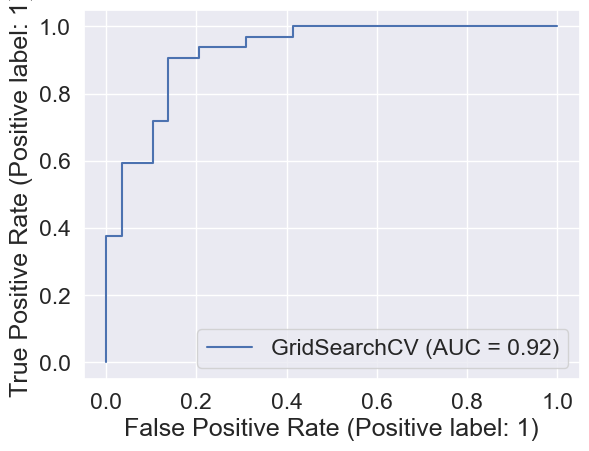

In [83]:
from sklearn.metrics import RocCurveDisplay
RocCurveDisplay.from_estimator(gs_log_reg, X_test, y_test)
plt.show()

In [63]:
y_predict_proba = gs_log_reg.predict_proba(X_test)[:,1]

In [68]:
y_predict_proba

array([0.13241553, 0.75571435, 0.81423848, 0.05461802, 0.88391595,
       0.87102206, 0.60476328, 0.00434615, 0.01374042, 0.56052338,
       0.71759394, 0.11919196, 0.88748682, 0.06007783, 0.96755244,
       0.93166805, 0.96410501, 0.09481397, 0.01772384, 0.02647224,
       0.71532475, 0.02719517, 0.14322135, 0.71680051, 0.88195478,
       0.69552441, 0.84208963, 0.69308227, 0.01820273, 0.87774213,
       0.07166657, 0.0668742 , 0.01513402, 0.14314717, 0.60299172,
       0.12643662, 0.66234845, 0.85013748, 0.81923719, 0.84105421,
       0.54427848, 0.79280459, 0.7774032 , 0.70510006, 0.83278827,
       0.02093854, 0.73149464, 0.93223095, 0.10221537, 0.06436393,
       0.13396005, 0.03539667, 0.80447276, 0.95313726, 0.31672376,
       0.00309999, 0.08713015, 0.93830967, 0.02815023, 0.01309175,
       0.06304264])

In [64]:
len(y_predict_proba) , len(y_test)

(61, 61)

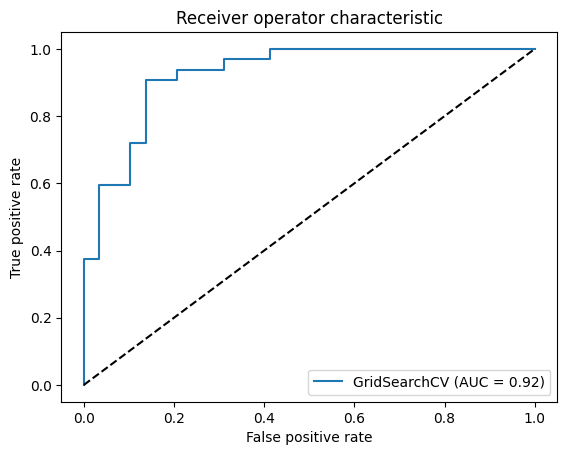

In [66]:
from sklearn.metrics import roc_curve, auc
fpr, tpr, thresholds = roc_curve(y_test, y_predict_proba)
roc_auc = auc(fpr, tpr)

# plot ROC under curve 
plt.plot(fpr, tpr, label= "GridSearchCV (AUC = %0.2f)"% roc_auc)
plt.plot([0,1], [0,1], "k--")
plt.xlabel("False positive rate")
plt.ylabel("True positive rate")
plt.title("Receiver operator characteristic")
plt.legend(loc="lower right")
plt.show()

In [73]:
# Confusion matrix 
print(confusion_matrix(y_test, y_preds))

[[25  4]
 [ 3 29]]


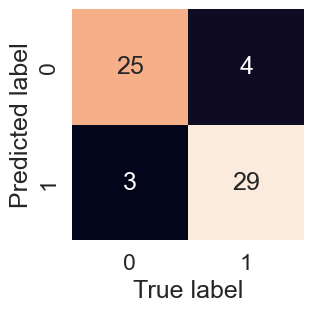

In [78]:
import seaborn as sns 
sns.set(font_scale=1.5)

def plot_conf_matrix(y_test, y_preds):
    
    """
    plots a nice looking confusion matrix using seaborns heatmap()
    
    """
    
    fig, ax = plt.subplots(figsize=(3,3))
    ax = sns.heatmap(confusion_matrix(y_test, y_preds), 
                    annot = True, 
                    cbar= False)
    plt.xlabel("True label")
    plt.ylabel("Predicted label")
    

plot_conf_matrix(y_test, y_preds)

Now we have got an ROC curve , an AUC metric and a confusion matrix. 
Lets get a classification report as well as cross-validated precision, recall and f-1 score. 

In [84]:
print(classification_report(y_test, y_preds))

              precision    recall  f1-score   support

           0       0.89      0.86      0.88        29
           1       0.88      0.91      0.89        32

    accuracy                           0.89        61
   macro avg       0.89      0.88      0.88        61
weighted avg       0.89      0.89      0.89        61



### Calculate evaluation metrics using cross-validation 

We are going to calcualate precision , recall and f-1 using cross validation score and we will be using cross_val_score(). 

In [85]:
# check best hyperparameter
gs_log_reg.best_params_

{'C': 0.20433597178569418, 'solver': 'liblinear'}

In [86]:
# Create a new classifier with best parameters 
clf = LogisticRegression(C = 0.20433597178569418, 
                        solver = "liblinear")

In [89]:
# Cross-validated accuracy 
cv_acc = cross_val_score(clf, X,y, cv=5, 
                        scoring="accuracy")

In [92]:
cv_acc = np.mean(cv_acc)
cv_acc

0.8446994535519124

In [94]:
# cross-validated precision 
cv_precision = cross_val_score(clf,X,y,cv=5,scoring="precision")
cv_precision = np.mean(cv_precision)
cv_precision

0.8207936507936507

In [95]:
# cross-validated recall score 
cv_recall = cross_val_score(clf,X, y , cv=5, scoring="recall")
cv_recall = np.mean(cv_recall)
cv_recall

0.9212121212121213

In [97]:
# cross-validated f1-score 
cv_f1 = cross_val_score(clf,X,y,cv=5,scoring="f1")
cv_f1 = np.mean(cv_f1)
cv_f1

0.8673007976269721

<Axes: title={'center': 'Cross-validated classification metrics'}>

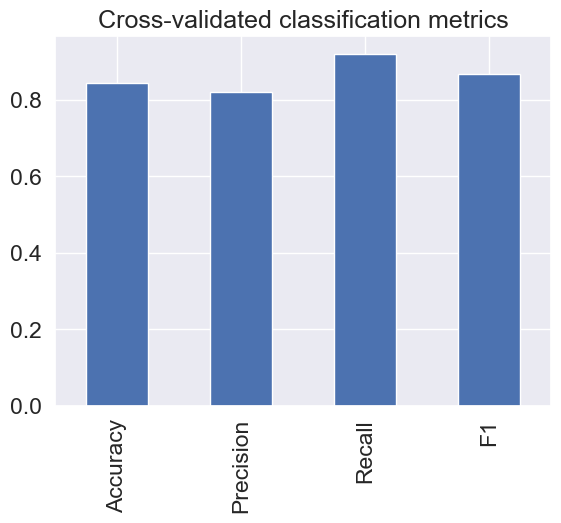

In [98]:
# Visualize cross-validated metrics 
cv_metrics = pd.DataFrame({
    "Accuracy": cv_acc, 
    "Precision": cv_precision, 
    "Recall": cv_recall, 
    "F1": cv_f1}, 
    index = [0]
)

cv_metrics.T.plot.bar(title="Cross-validated classification metrics", 
                     legend = False)

* Feature importance is another of asking which of the features contributed most outcomes of the model and how did they contribute.  

* finding features is different for each machine learning model. 

* Lets find feature importance for our logistic regression model... 

In [99]:
df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [103]:
# Fit an instance of LogisticRegression 

gs_log_reg.best_params_

clf = LogisticRegression(C=0.20433597178569418, 
                        solver = "liblinear")

clf.fit(X_train, y_train);

In [105]:
# check coef_ : gives us the value , how each of the features contributes to the target labels
clf.coef_

array([[ 0.00320769, -0.86062049,  0.66001432, -0.01155971, -0.00166496,
         0.04017236,  0.31603405,  0.02458922, -0.60470171, -0.56795456,
         0.45085392, -0.63733328, -0.67555094]])

In [106]:
# Match coef's of features to columns 
feature_dict = dict(zip(df.columns, list(clf.coef_[0])))
feature_dict

{'age': 0.0032076883508599633,
 'sex': -0.8606204883695241,
 'cp': 0.660014324982524,
 'trestbps': -0.01155970600550047,
 'chol': -0.0016649614843449207,
 'fbs': 0.040172360271308105,
 'restecg': 0.31603405294617176,
 'thalach': 0.02458922341328129,
 'exang': -0.604701713592625,
 'oldpeak': -0.5679545646616215,
 'slope': 0.4508539209693025,
 'ca': -0.6373332766360461,
 'thal': -0.6755509369619848}

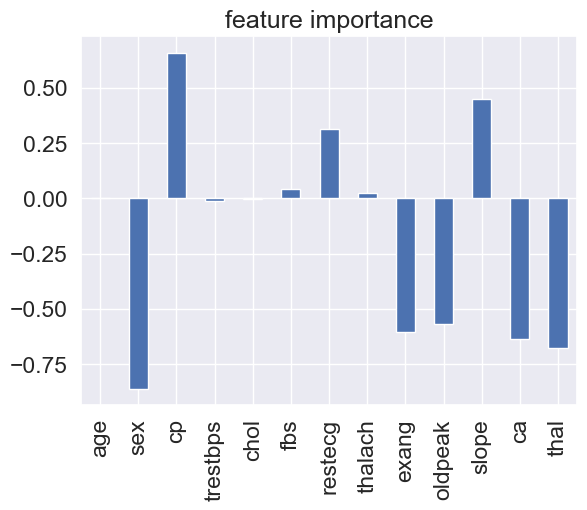

In [107]:
# Visualize feature importance 
feature_df = pd.DataFrame(feature_dict, index=[0])
feature_df.T.plot.bar(title="feature importance", legend=False);

In [108]:
pd.crosstab(df["sex"], df["target"])

target,0,1
sex,,
0,24,72
1,114,93


In [110]:
pd.crosstab(df["slope"], df["target"])

target,0,1
slope,,
0,12,9
1,91,49
2,35,107


slope : the slope of the peak exercise ST segment
* -- Value 1: upsloping
* -- Value 2: flat
* -- Value 3: downsloping

### Experimentation 

if you havent hit your evaluation metric yet... ask yourself... 

* Could you collect more data? 
* Could you try a better model ? Like CatBoost or XGBoost ?
* Could you improve the current models ? (beyond what we have done so far)
* If your model is good enoug (you have hit your evaluation metric) how would you export it and share it with others ?